
<div style="line-height:2px;border: solid orange">
    <p>
    <p style="color:blue;font-family:arial;text-align:right;font-size:20"> Visión por Computador &nbsp;&nbsp;
    <p style="color:blue;font-family:arial;text-align:right;font-size:16"> Master en Ciencias de Datos e Ingeniería de ordenadores   &nbsp;&nbsp;
  <p style="color:blue;font-family:arial;text-align:right;font-size:16"> Rosa Mª. Rodríguez Sánchez   &nbsp;&nbsp;
    <p style="color:blue;font-family:arial;text-align:right;font-size:10"> Dpto. Ciencias de la Computación e Inteligencia Artificial. &nbsp;&nbsp;  
    <p style="color:blue;font-family:arial;text-align:right;font-size:10"> ETSIIT. Universidad de Granada   &nbsp;&nbsp;
        <p>
</div>

## Práctica 2. Espacios de Color. Histograma


### Convirtiendo imágenes entre diferentes espacios de color

OpenCV implementa diferentes modelos de color. Algunos modelos de color son normalmente usados por dispositivos de entrada tales como cámaras, mientras que otros modelos son usados en dispositivos de salida como televisiones, displays o impresoras. 
Normalmente cuando trabajamos con técnicas de visión por computador con imágenes, lo común es trabajar con tres tipos de modelos de color: niveles de gris, BGR o RGB y hue-saturation-value (HSV).



El modelo HSV se caracteriza por tener tres componentes:
* Color (Hue H): El rango permitido es de 0 a 179 
* Saturación (S): que describe la pureza del color. Con rango en [0-255]
* Brillo (V): Intensidad del color 0 es mas oscuro y 1 es más claro. Con rango en [0-255]
<table>
    <tr><td> <img src="Triangulo_HSV.png"></td><td><img src="hsv.webP"></td></tr>
</table>    

#### Hue Saturation Value HSV 

Text(0.5, 1.0, 'Brillo')

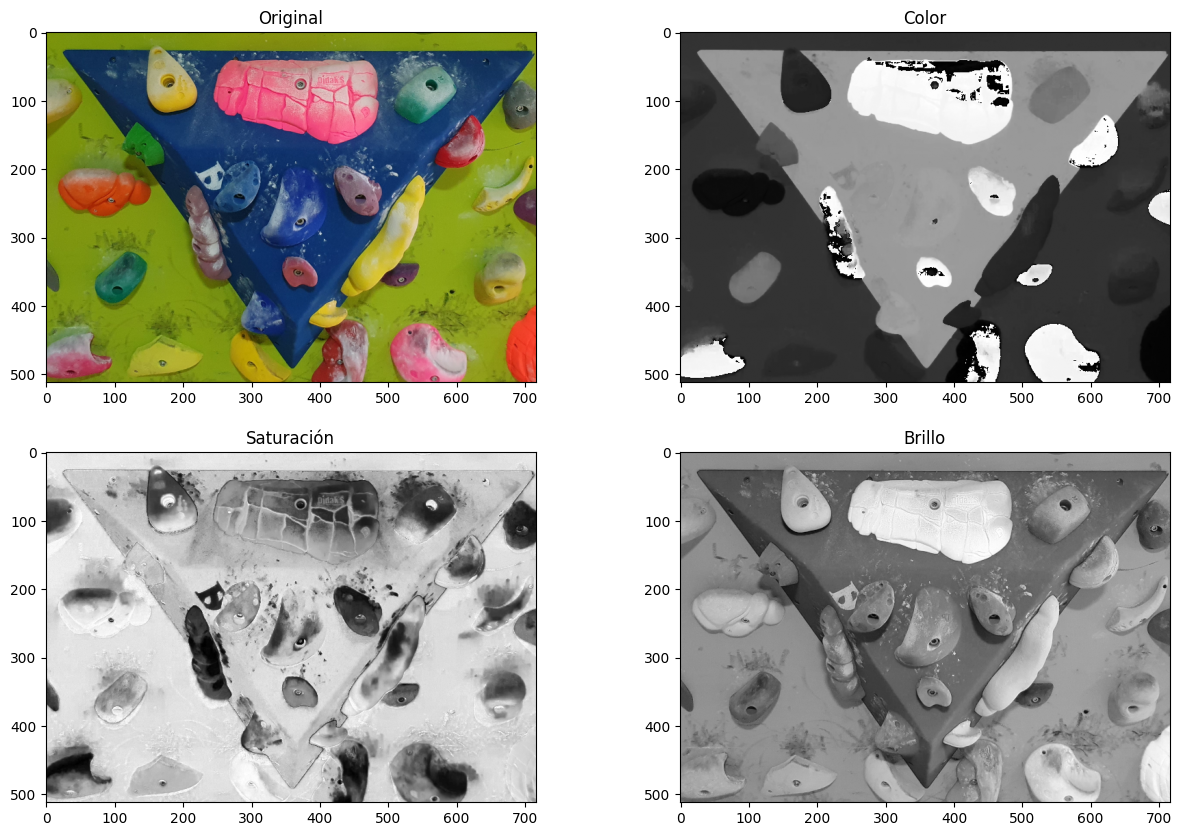

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("roco.png")
imgaux = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Covertimos a HSV
imghsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# mostramos la información del color, saturacion y brillo
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(imgaux)
plt.title("Original")

plt.subplot(2, 2, 2)
plt.imshow(imghsv[:, :, 0], "gray")
plt.title("Color")

plt.subplot(2, 2, 3)
plt.imshow(imghsv[:, :, 1], "gray")
plt.title("Saturación")


plt.subplot(2, 2, 4)
plt.imshow(imghsv[:, :, 2], "gray")
plt.title("Brillo")


Vamos a obtener los valores de los colores básicos (rojo, verde y azul) en hsv.

In [2]:
green = np.uint8([[[0, 255, 0]]])
hsv_green = cv2.cvtColor(green, cv2.COLOR_BGR2HSV)
print("Verde: ", hsv_green)

blue = np.uint8([[[255, 0, 0]]])
hsv_blue = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)
print("Azul:", hsv_blue)

red = np.uint8([[[0, 0, 255]]])
hsv_red = cv2.cvtColor(red, cv2.COLOR_BGR2HSV)
print("Rojo:", hsv_red)


Verde:  [[[ 60 255 255]]]
Azul: [[[120 255 255]]]
Rojo: [[[  0 255 255]]]


Para entender mejor el sistema HSV vamos a crear una imagen artificial toda con valores de rojo. La vamos a pasar a HSV para ver como se representa el rojo. A continuación vamos a variar la saturación.

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

rojo = np.ones((200, 200, 3), dtype="uint8") * 255
# bgr dejamos sola r a 255
rojo[:, :, 0] = 0
rojo[:, :, 1] = 0
size = rojo.shape[:2]
rojohsv = cv2.cvtColor(rojo, cv2.COLOR_BGR2HSV)
print("Rojo: ", rojohsv[0, 0, :])
fps = 10

video = cv2.VideoWriter("rojos.avi", cv2.VideoWriter_fourcc(*"DIVX"), fps, size)
aux = rojohsv

img_array = []

for i in range(0, 256):
    aux[:, :, 1] = i
    # volvemos a rgb
    frame = cv2.cvtColor(aux, cv2.COLOR_HSV2BGR)
    img_array.append(frame)
for i in range(len(img_array)):
    video.write(img_array[i])

video.release()


Rojo:  [  0 255 255]


### Ciclamos el color en una imagen.
Vamos a crear un video en la que vamos a ciclar los colores de una imagen

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("pez1.jpg")
height, width, channels = img.shape
pezhsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

fps = 10
videoCapture = cv2.VideoCapture(0)
size = (
    int(videoCapture.get(cv2.CAP_PROP_FRAME_WIDTH)),
    int(videoCapture.get(cv2.CAP_PROP_FRAME_HEIGHT)),
)
video = cv2.VideoWriter("pez_color.avi", cv2.VideoWriter_fourcc(*"DIVX"), fps, size)
aux = pezhsv

img_array = []

for i in range(0, 180):
    aux[:, :, 0] = (aux[:, :, 0] + 1) % 180

    # volvemos a rgb
    frame = cv2.cvtColor(aux, cv2.COLOR_HSV2BGR)
    frame = cv2.resize(frame, size, interpolation=cv2.INTER_AREA)
    img_array.append(frame)
for i in range(len(img_array)):
    video.write(img_array[i])

video.release()

### SEGMENTAR POR COLOR
El objetivo es seleccionar los pixeles que tienen un determinado color.  En el siguiente ejemplo vamos obtener una máscara que nos indique donde se encuentra la información que contenga un determinado color. 

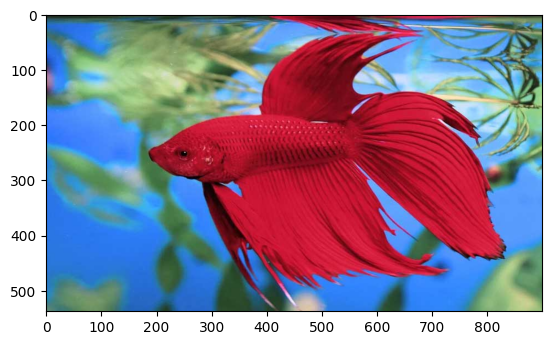

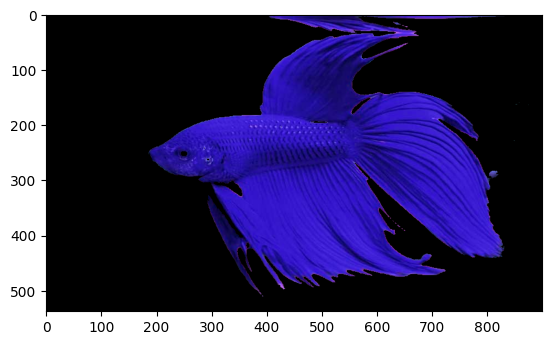

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("pez3.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
# Buscamos los valores que contengan rojos
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_rojo = np.array([0, 128, 50])
upper_rojo = np.array([30, 255, 255])
# Obtenemos una mascara con los valores de rojos
mask = cv2.inRange(img_hsv, lower_rojo, upper_rojo)
lower_rojo = np.array([150, 128, 50])
upper_rojo = np.array([179, 255, 255])
mask2 = cv2.inRange(img_hsv, lower_rojo, upper_rojo)
mask = cv2.bitwise_or(mask, mask2)
# Hacemos una operacion AND entre la imagen original y mascara
res = cv2.bitwise_and(img, img, mask=mask)
cv2.imshow("Original", img)
cv2.imshow("mask", mask)
cv2.imshow("res", res)
while 1:
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()
plt.figure()
plt.imshow(res)


### Otros Modelos de Color
Existe otros espacios de color que dependiendo del objetivo que queramos analizar pueden ser interesantes usarlos.
#### Modelo YCrCb
Se utiliza para representar el color en aplicaciones sobre todo de compresión. Representa la lumninancia Y y dos bandas cromáticas. Los sistemas de compresión  reducen las bandas Cr y Cb a la mitad de la resolución de la imagen original. Se suele usar en sistemas de compresión mpeg y jpeg. 

Text(0.5, 1.0, 'Cb')

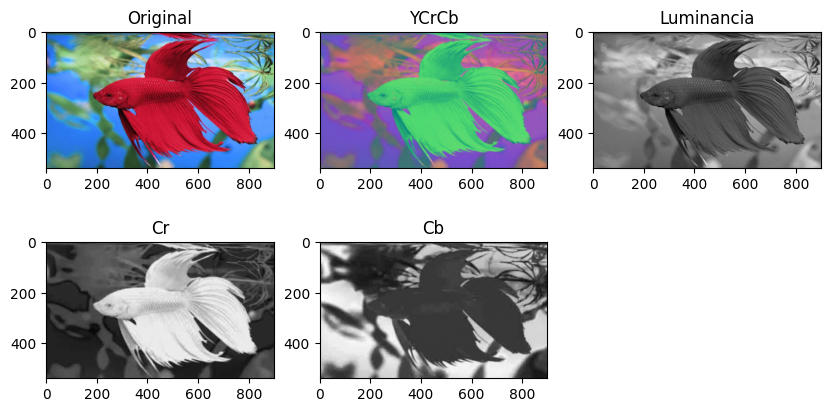

In [6]:
from matplotlib import pyplot as plt
import cv2

img = cv2.imread("pez3.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgYCrCb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
plt.figure(figsize=(10, 5))
plt.subplot(2, 3, 1)
plt.imshow(img)
plt.title("Original")
plt.subplot(2, 3, 2)
plt.imshow(imgYCrCb)
plt.title("YCrCb")
plt.subplot(2, 3, 3)
plt.imshow(imgYCrCb[:, :, 0], "gray")
plt.title("Luminancia")
plt.subplot(2, 3, 4)
plt.imshow(imgYCrCb[:, :, 1], "gray")
plt.title("Cr")
plt.subplot(2, 3, 5)
plt.imshow(imgYCrCb[:, :, 2], "gray")
plt.title("Cb")


#### Modelo Lab
Las siglas LAB se refieren al espacio de color tridimensional, en donde L  es luminosidad de negro a blanco, **a** va de rojo a verde y  **b** va de azul a amarillo. Actualmente se usa en Adobe Photoshop, archivos TIFF y documentos PDF.

Text(0.5, 1.0, 'b')

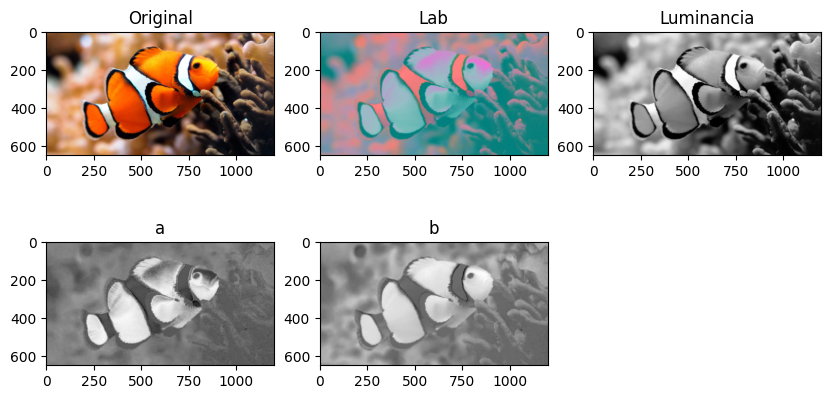

In [7]:
from matplotlib import pyplot as plt
import cv2

img = cv2.imread("pez2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgLab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
plt.figure(figsize=(10, 5))
plt.subplot(2, 3, 1)
plt.imshow(img)
plt.title("Original")
plt.subplot(2, 3, 2)
plt.imshow(imgLab)
plt.title("Lab")
plt.subplot(2, 3, 3)
plt.imshow(imgLab[:, :, 0], "gray")
plt.title("Luminancia")
plt.subplot(2, 3, 4)
plt.imshow(imgLab[:, :, 1], "gray")
plt.title("a")
plt.subplot(2, 3, 5)
plt.imshow(imgLab[:, :, 2], "gray")
plt.title("b")


### Histograma
El histograma es un grafo que nos permite visualizar la distribución de intensidad de una imagen. Analizando el histograma de una imagen, se puede obtener una aproximación al contraste, brillo, distribución de la intensidad de la imagen.  En Opencv podemos obtener el histograma usando  ***cv2.calcHist()***
La cabecera de esta función es la siguiente:

 **cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**
* images :  es la imagen sobre la que queremos obtener el histograma. Puede ser de tipo uint8 o float32. Se debe dar encerrada entre corchetes “[img]”.
* channels : Igualmente se indica entre corchetes. Es el índice del canal para el que queremos obtener el histograma. Si la imagen es una imagen de niveles de gris entonces le damos [0]. Pero si es una imagen de color le podemos dar el valor [0],[1] o [2], para obtener el histograma sobre el canal rojo, verde o azul respectivamente.
* mask : es la imagen máscara. Si queremos obtener el histograma sobre la imagen entera le damos el valor "None". Pero si queremos obtener el histograma sobre una región podemos indicarlo con la máscara. 
* histSize : cuantos contadores tendrá nuestro histograma. Si se quiere aplicar sobre una imagen de niveles de gris el numero de contadores será 256 normalmente. Para ello indicaremos [256].
* ranges : Sobre que rango de valores de la imagen de entrada queremos obtener el histograma. Normalemente será [0,256]
* hist: por defecto true. Indica si los bin son uniformes.
* accumulate: por defecto es false. Si es true no inicializa a cero el histograma para obtener el histograma de multiples imagenes.

    


(256, 256)


(0.0, 256.0)

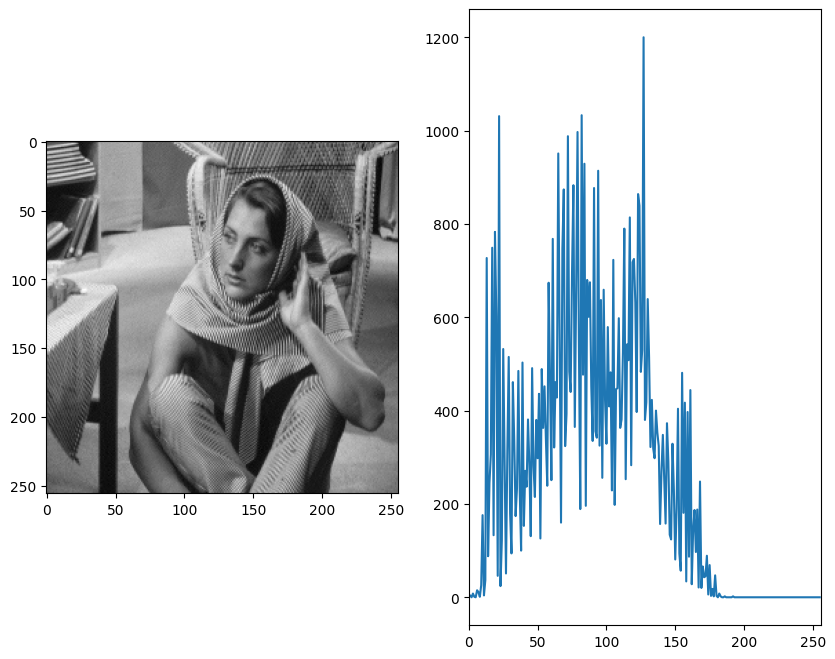

In [8]:
from matplotlib import pyplot as plt
import cv2

img = cv2.imread("barbara.png", cv2.IMREAD_GRAYSCALE)
print(img.shape)

plt.figure(figsize=(10, 8))
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.subplot(121), plt.imshow(img, "gray")
plt.subplot(122), plt.plot(hist)
plt.xlim([0, 256])

A continuación se muestra sobre una imagen de color los histogramas del rojo, verde y azul

(0.0, 256.0)

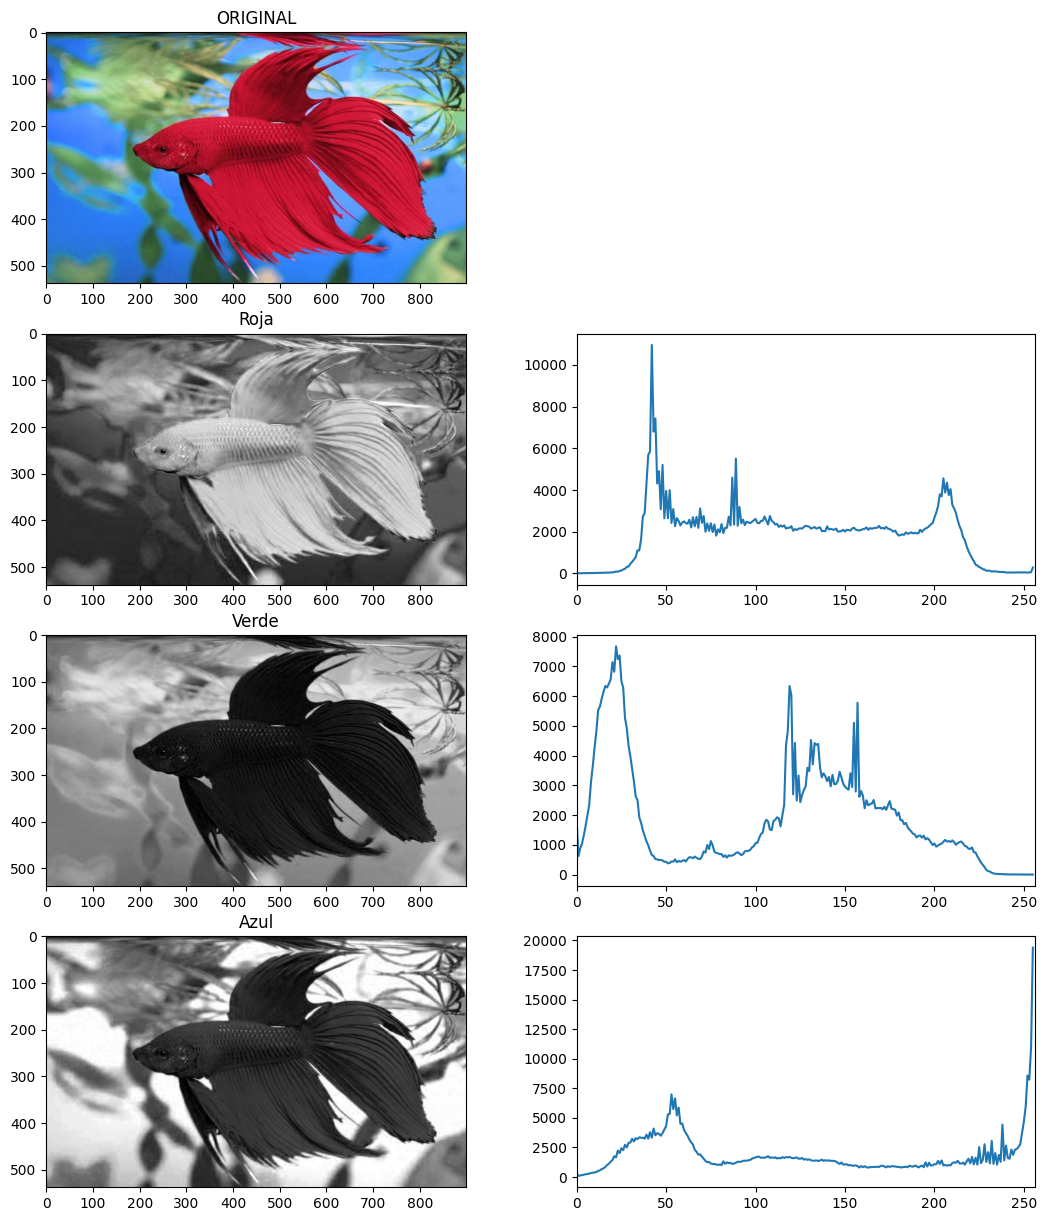

In [9]:
from matplotlib import pyplot as plt
import cv2

img = cv2.imread("pez3.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(13, 15))
histrojo = cv2.calcHist([img], [0], None, [256], [0, 256])
histverde = cv2.calcHist([img], [1], None, [256], [0, 256])
histazul = cv2.calcHist([img], [2], None, [256], [0, 256])

plt.subplot(421), plt.imshow(img), plt.title("ORIGINAL")
plt.subplot(423), plt.imshow(img[:, :, 0], "gray"), plt.title("Roja")
plt.subplot(424), plt.plot(histrojo)
plt.xlim([0, 256])
plt.subplot(425), plt.imshow(img[:, :, 1], "gray"), plt.title("Verde")
plt.subplot(426), plt.plot(histverde)
plt.xlim([0, 256])
plt.subplot(427), plt.imshow(img[:, :, 2], "gray"), plt.title("Azul")
plt.subplot(428), plt.plot(histazul)
plt.xlim([0, 256])

Mostramos el histograma del color, saturación y brillo

(0.0, 256.0)

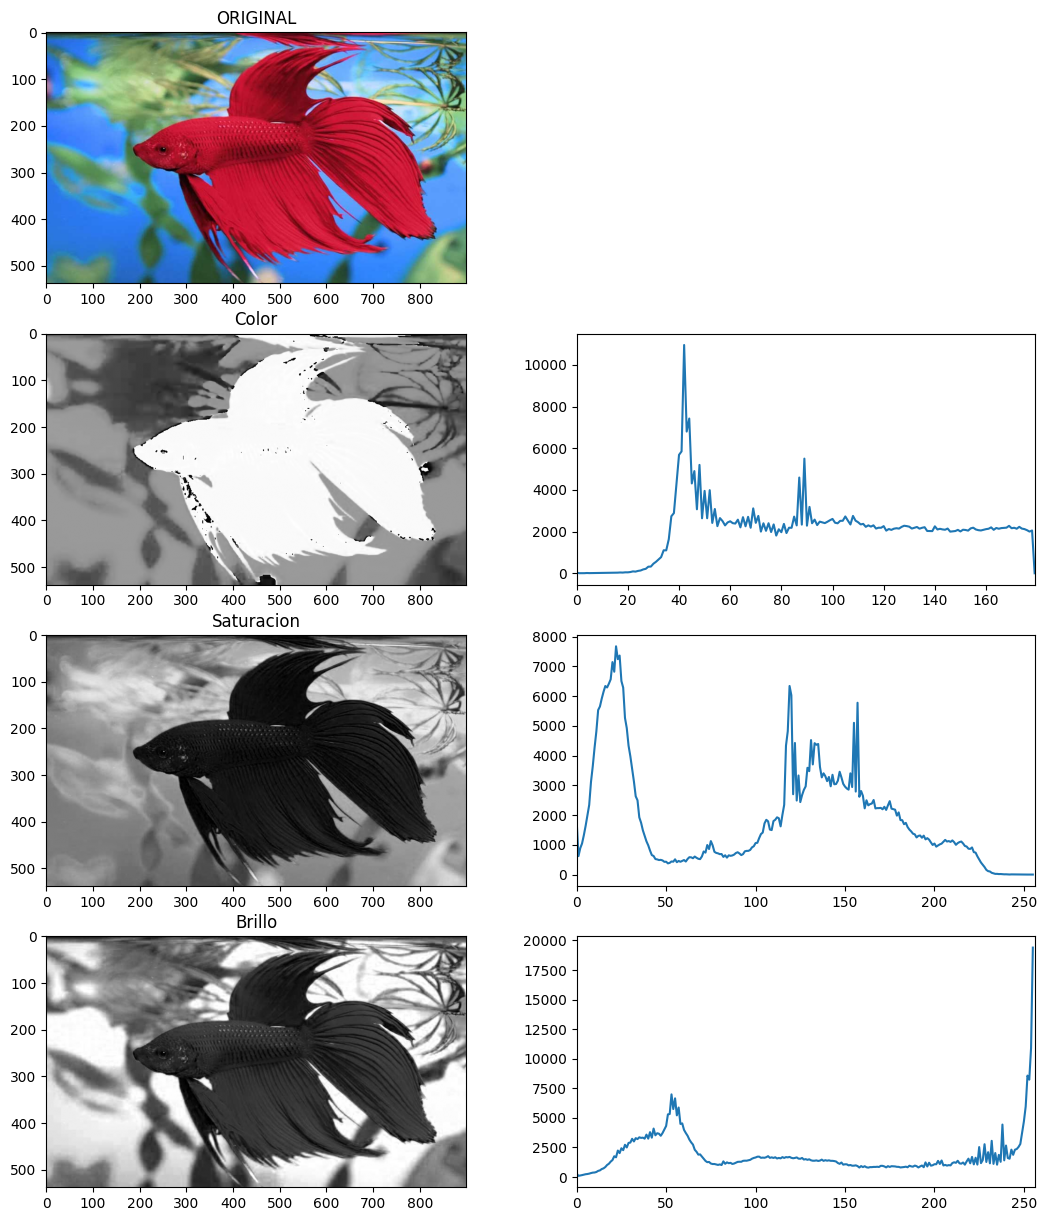

In [10]:
from matplotlib import pyplot as plt
import cv2

img = cv2.imread("pez3.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imghsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.figure(figsize=(13, 15))
histcolor = cv2.calcHist([img], [0], None, [180], [0, 179])
histsaturacion = cv2.calcHist([img], [1], None, [256], [0, 256])
histbrillo = cv2.calcHist([img], [2], None, [256], [0, 256])

plt.subplot(421), plt.imshow(img), plt.title("ORIGINAL")
plt.subplot(423), plt.imshow(imghsv[:, :, 0], "gray"), plt.title("Color")
plt.subplot(424), plt.plot(histcolor)
plt.xlim([0, 179])
plt.subplot(425), plt.imshow(img[:, :, 1], "gray"), plt.title("Saturacion")
plt.subplot(426), plt.plot(histsaturacion)
plt.xlim([0, 256])
plt.subplot(427), plt.imshow(img[:, :, 2], "gray"), plt.title("Brillo")
plt.subplot(428), plt.plot(histbrillo)
plt.xlim([0, 256])

### Ejercicios
<ol>
    <li> Obtener la representación en hsv de los colores: amarillo, naranja, púrpura,
    <li> Crear un video para obtener la gama de grises de una imagen       <li> Crear un video para obtener para el color verde todos sus valores diferentes en luminosidad.
    <li> Crear un video para obtener para el color azul todos sus valores diferentes en saturación
    <li> Sobre la imagen pez2 segmentar la información naranja
    <li> Sobre la imagen pez1 cambiar el azul a naranja 
    <li> Aplicar chroma_key sobre la imagen praga y la imagen de chica.  El objetivo es obtener una nueva imagen que en primer plano este la chica y en segundo plano praga. Permitir colocar la imagen de la chica en cualquier punto de la imagen de praga. Para ello definir una función  con los siguientes parámetros: 
<ul>        
<li> La imagen de fondo (praga en el ejemplo)
<li>La imagen en primer plano (la chicha en el ejemplo), 
<li> El color que permite distinguir el fondo en la imagen de primer plano. Damos una terna con los valores rgb ( en el ejemplo el verde )
<li>La esquina superior izquierda a partir de la cual se coloca la imagen de primer plano sobre las imagen de fondo (por ejemplo 50,50).
</ul>        
En el codigo llamar a esta función para obtener el resultado de la chica sobre praga.
En el caso de que la imagen de primer plano a partir de la esquina no entra toda en la imagen de fondo se pone lo que se entre.         
<table>
    <tr><td><img src="praga1.jpg"></td><td><img src="chica.jpg"></td><td><img src="res.jpg"></td></tr>
<tr><td>PRAGA</td><td>CHICA</td><td>RESULTADO</td></tr> 
</table>
    <li> Obtener el histograma del canal rojo, verde y azul solamente sobre el pez en la imagen pez3.jpg. Es decir debeis  primero conseguir una máscara que os aisle el pez para obtener los histogramas y darle como parámetro esa máscara. 
</ol>        
        

# Ejercicio 1

Amarillo:  [[[ 90 255 255]]]
Naranja: [[[101 255 255]]]
Púrpura: [[[150 255 128]]]


Text(0.5, 1.0, 'Purple')

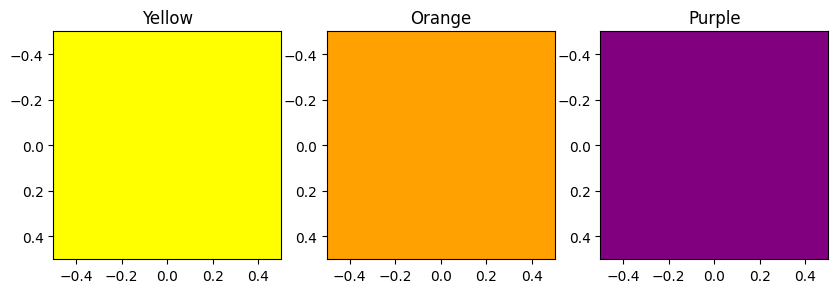

In [11]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

yellow = np.uint8([[[255, 255, 0]]])
hsv_yellow = cv2.cvtColor(yellow, cv2.COLOR_BGR2HSV)
print("Amarillo: ", hsv_yellow)

orange = np.uint8([[[255, 165, 0]]])
hsv_orange = cv2.cvtColor(orange, cv2.COLOR_BGR2HSV)
print("Naranja:", hsv_orange)

purple = np.uint8([[[128, 0, 128]]])
hsv_purple = cv2.cvtColor(purple, cv2.COLOR_BGR2HSV)
print("Púrpura:", hsv_purple)

yellow_rgb = cv2.cvtColor(hsv_yellow, cv2.COLOR_HSV2BGR)
orange_rgb = cv2.cvtColor(hsv_orange, cv2.COLOR_HSV2BGR)
purple_rgb = cv2.cvtColor(hsv_purple, cv2.COLOR_HSV2BGR)

plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.imshow(yellow_rgb)
plt.title("Yellow")

plt.subplot(132)
plt.imshow(orange_rgb)
plt.title("Orange")

plt.subplot(133)
plt.imshow(purple_rgb)
plt.title("Purple")

# Ejercicio 2

In [12]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

grey = np.ones((200, 200), dtype="uint8") * 255
size = grey.shape
fps = 10

video = cv2.VideoWriter("grises.avi", cv2.VideoWriter_fourcc(*"DIVX"), fps, size)
aux = grey

img_array = []

for i in range(255, -1, -1):
    aux[:, :] = i
    frame = cv2.cvtColor(aux, cv2.COLOR_GRAY2BGR)
    img_array.append(frame)
for i in range(len(img_array)):
    video.write(img_array[i])

video.release()

# Ejercicio 3

In [13]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

green = np.zeros((200, 200, 3), dtype="uint8")
size = grey.shape[:2]
green[:, :, 1] = 255
greenhsv = cv2.cvtColor(green, cv2.COLOR_RGB2HSV)

fps = 10

video = cv2.VideoWriter("verdes.avi", cv2.VideoWriter_fourcc(*"DIVX"), fps, size)
aux = greenhsv

img_array = []

for i in range(0, 256):
    aux[:, :, 2] = i
    frame = cv2.cvtColor(aux, cv2.COLOR_HSV2RGB)
    img_array.append(frame)
for i in range(len(img_array)):
    video.write(img_array[i])

video.release()

# Ejercicio 4

In [14]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

blue = np.zeros((200, 200, 3), dtype="uint8")
size = blue.shape[:2]
blue[:, :, 0] = 255

bluehsv = cv2.cvtColor(blue, cv2.COLOR_RGB2HSV)

fps = 10

video = cv2.VideoWriter("azules.avi", cv2.VideoWriter_fourcc(*"DIVX"), fps, size)
aux = bluehsv

img_array = []

for i in range(0, 256):
    aux[:, :, 1] = i
    frame = cv2.cvtColor(aux, cv2.COLOR_HSV2RGB)
    img_array.append(frame)
for i in range(len(img_array)):
    video.write(img_array[i])

video.release()

# Ejercicio 5

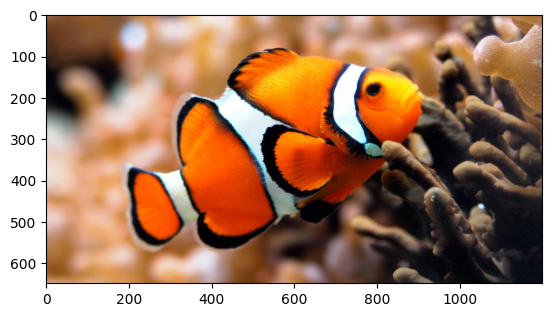

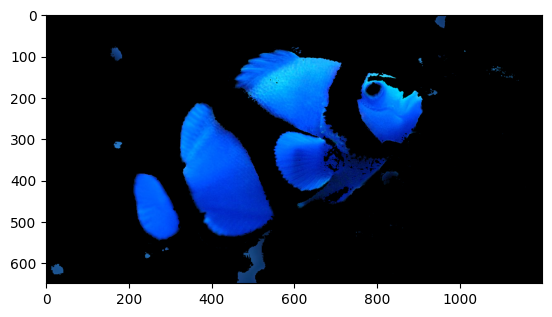

In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("pez2.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Valores naranja
lower_orange = np.array([5, 200, 20])
upper_orange = np.array([25, 255, 255])
mask = cv2.inRange(img_hsv, lower_orange, upper_orange)

res = cv2.bitwise_and(img, img, mask=mask)

cv2.imshow("Original", img)
cv2.imshow("mask", mask)
cv2.imshow("res", res)

while 1:
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
plt.figure()
plt.imshow(res)

# Ejercicio 6

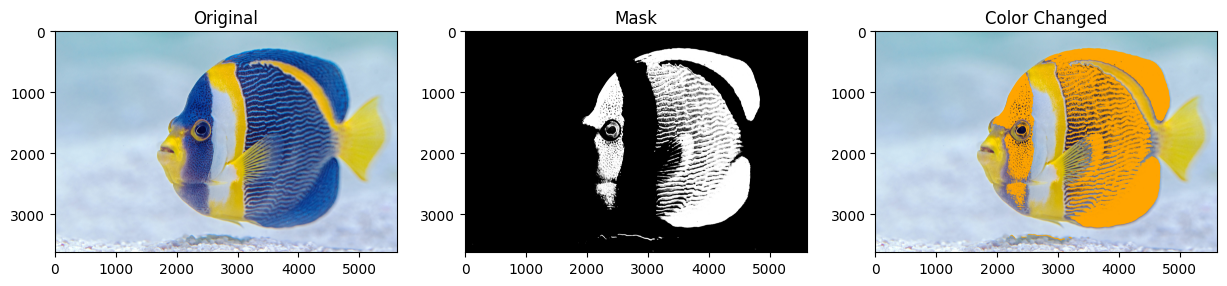

In [16]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("pez1.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_blue = np.array([86, 100, 90])
upper_blue = np.array([135, 255, 255])

mask = cv2.inRange(img_hsv, lower_blue, upper_blue)

modified_img = img.copy()

orange_bgr = [0, 165, 255] 

modified_img[mask > 0] = orange_bgr

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")

plt.subplot(132)
plt.imshow(mask, cmap="gray")
plt.title("Mask")

plt.subplot(133)
plt.imshow(cv2.cvtColor(modified_img, cv2.COLOR_BGR2RGB))
plt.title("Color Changed")
plt.show()

# Ejercicio 7

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def chroma_key(background_img, img, bounds, corner_pixel):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(img_hsv, bounds[0], bounds[1])
    mask_inv = cv2.bitwise_not(mask)

    foreground = cv2.bitwise_and(img, img, mask=mask_inv)
    result = background_img.copy()

    background_cropped = result[
        corner_pixel[0] : corner_pixel[0] + img.shape[0],
        corner_pixel[1] : corner_pixel[1] + img.shape[1],
    ]
    
    if mask.shape != background_cropped.shape[:2]:
        raise ValueError("Cornel pixel not valid")
    
    roi = cv2.bitwise_and(background_cropped, background_cropped, mask=mask)

    roi_combined = cv2.add(foreground, roi)
    
    result[
        corner_pixel[0]:corner_pixel[0] + img.shape[0],
        corner_pixel[1]:corner_pixel[1] + img.shape[1]
    ] = roi_combined

    return result


background = cv2.imread("praga1.jpg")
girl = cv2.imread("chica.jpg")


lower_hsv = np.array([35, 100, 50])
upper_hsv = np.array([85, 255, 255])

new_img = chroma_key(background, girl, [lower_hsv, upper_hsv], [100, 20])

plt.figure(figsize=(15, 5))
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.title("Chroma Key Result")
plt.axis("off")
plt.show()


# Ejercicio 8

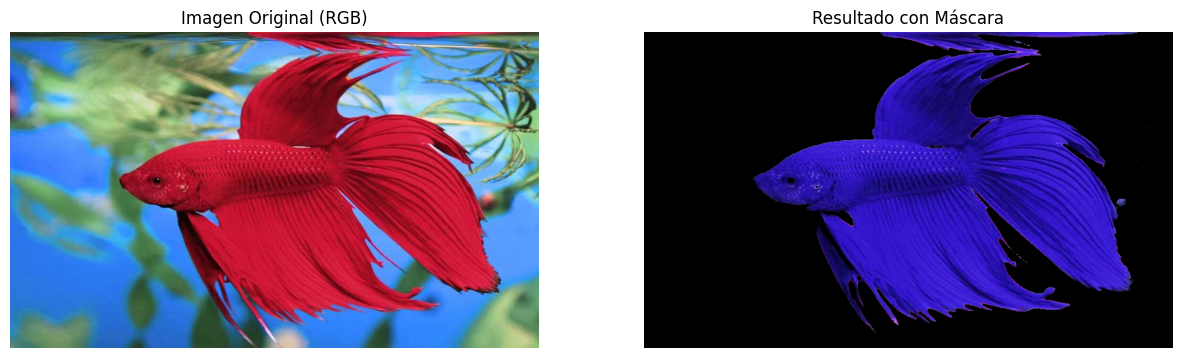

Text(0.5, 1.0, 'Blue hist')

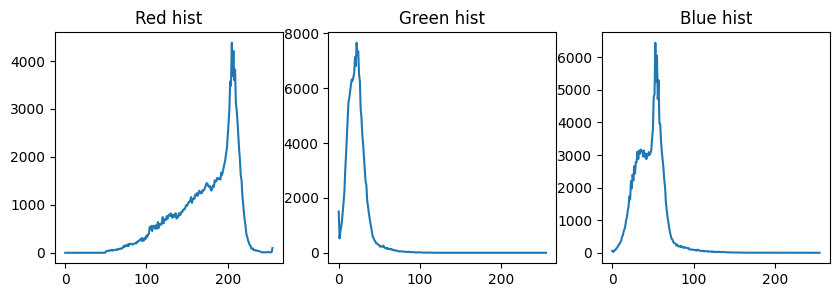

In [18]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("pez3.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_rojo = np.array([0, 128, 50])
upper_rojo = np.array([30, 255, 255])
mask = cv2.inRange(img_hsv, lower_rojo, upper_rojo)
lower_rojo = np.array([150, 128, 50])
upper_rojo = np.array([179, 255, 255])
mask2 = cv2.inRange(img_hsv, lower_rojo, upper_rojo)
mask = cv2.bitwise_or(mask, mask2)
res = cv2.bitwise_and(img, img, mask=mask)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title("Imagen Original (RGB)")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(122)
plt.title("Resultado con Máscara")
plt.imshow(res)
plt.axis("off")

plt.show()

red_hist = cv2.calcHist([img_rgb], [0], mask, [256], [0, 256])
green_hist = cv2.calcHist([img_rgb], [1], mask, [256], [0, 256])
blue_hist = cv2.calcHist([img_rgb], [2], mask, [256], [0, 256])

plt.figure(figsize=(10, 3))

plt.subplot(131)
plt.plot(red_hist)
plt.title("Red hist")

plt.subplot(132)
plt.plot(green_hist)
plt.title("Green hist")

plt.subplot(133)
plt.plot(blue_hist)
plt.title("Blue hist")